# Study of CNN model on CIFAR-10

## Summary

From this notebook, I have learnt an approach to build a CNN model to improve the accuracy and also see how the deeper model effects the performance. In this model, I tried my own CNN model and improves the accuracy from **67.48%** to **79.55%** without using any pre trained model and data augmentation.

In [1]:
import keras

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [5]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Untaring file...
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


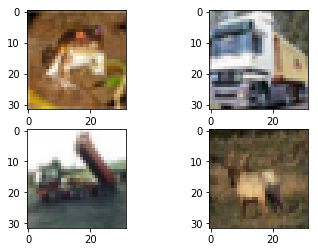

In [6]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [8]:
y_train

array([[6],
       [9],
       [9],
       ..., 
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [20]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides=(1,1), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64, (3,3), strides=(1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_14 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
__________

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])

In [22]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 101s - loss: 1.5947 - acc: 0.4282 - val_loss: 1.3646 - val_acc: 0.5197
Epoch 2/20
40000/40000 [==============================] - 99s - loss: 1.2552 - acc: 0.5537 - val_loss: 1.2242 - val_acc: 0.5753
Epoch 3/20
40000/40000 [==============================] - 101s - loss: 1.1032 - acc: 0.6114 - val_loss: 1.1171 - val_acc: 0.6119
Epoch 4/20
40000/40000 [==============================] - 101s - loss: 0.9994 - acc: 0.6505 - val_loss: 1.0708 - val_acc: 0.6285
Epoch 5/20
40000/40000 [==============================] - 102s - loss: 0.9133 - acc: 0.6823 - val_loss: 0.9943 - val_acc: 0.6568
Epoch 6/20
40000/40000 [==============================] - 101s - loss: 0.8531 - acc: 0.7018 - val_loss: 0.9678 - val_acc: 0.6671
Epoch 7/20
40000/40000 [==============================] - 106s - loss: 0.7875 - acc: 0.7243 - val_loss: 0.9390 - val_acc: 0.6824
Epoch 8/20
40000/40000 [========================

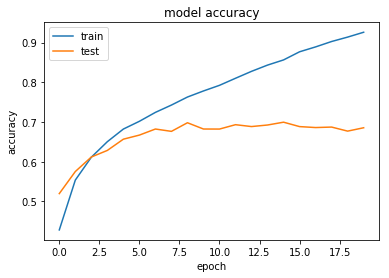

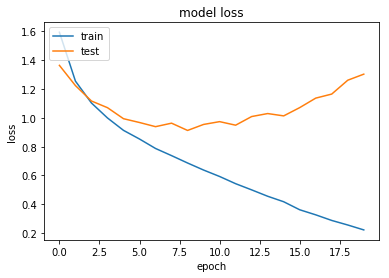

In [23]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
# evaluate the network
loss, accuracy = model.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

 9984/10000 [============================>.] - ETA: 0s
Loss: 1.35, Accuracy: 67.48%


-----------------------------------------------

In [33]:
model2 = Sequential()
model2.add(Conv2D(32, (3,3), strides=(1,1), padding='same', input_shape=(32,32,3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model2.add(Conv2D(64, (3,3), strides=(1,1)))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3,3), strides=(1,1)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.25))
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_34 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_35 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
activation_36 (Activation)   (None, 12, 12, 64)        0         
__________

In [34]:
model2.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])
history2 = model2.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 177s - loss: 1.6735 - acc: 0.3901 - val_loss: 1.3884 - val_acc: 0.5014
Epoch 2/20
40000/40000 [==============================] - 165s - loss: 1.3272 - acc: 0.5209 - val_loss: 1.1710 - val_acc: 0.5922
Epoch 3/20
40000/40000 [==============================] - 165s - loss: 1.1877 - acc: 0.5770 - val_loss: 1.0921 - val_acc: 0.6149
Epoch 4/20
40000/40000 [==============================] - 164s - loss: 1.0806 - acc: 0.6186 - val_loss: 0.9791 - val_acc: 0.6566
Epoch 5/20
40000/40000 [==============================] - 165s - loss: 1.0227 - acc: 0.6371 - val_loss: 0.9424 - val_acc: 0.6667
Epoch 6/20
40000/40000 [==============================] - 165s - loss: 0.9512 - acc: 0.6654 - val_loss: 0.9265 - val_acc: 0.6740
Epoch 7/20
40000/40000 [==============================] - 164s - loss: 0.9064 - acc: 0.6805 - val_loss: 0.8656 - val_acc: 0.6995
Epoch 8/20
40000/40000 [=======================

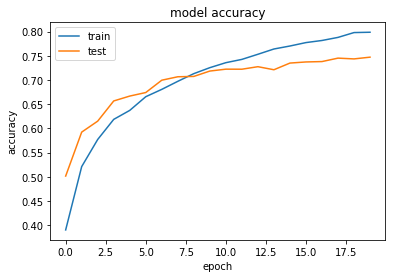

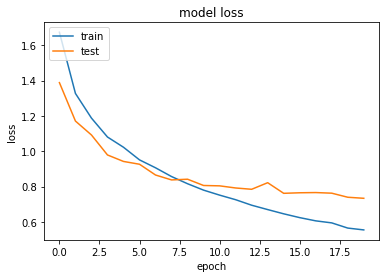

In [35]:
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
# evaluate the network
loss, accuracy = model2.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

 9984/10000 [============================>.] - ETA: 0s
Loss: 0.76, Accuracy: 73.85%


---------------------------

In [44]:
model3 = Sequential()
model3.add(Conv2D(32, (3,3), strides=(1,1), padding='same', input_shape=(32,32,3)))
model3.add(Activation('relu'))
model3.add(Conv2D(32, (3,3),  padding='same' ,strides=(1,1)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, (3,3),  padding='same' ,strides=(1,1)))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3,3), strides=(1,1)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=(2,2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dropout(0.25))
model3.add(Dense(10))
model3.add(Activation('softmax'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_68 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_69 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 16, 16, 64)        18496     
__________

In [45]:
model3.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])
history3 = model3.fit(X_train, Y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 357s - loss: 1.6557 - acc: 0.3932 - val_loss: 1.2902 - val_acc: 0.5350
Epoch 2/15
40000/40000 [==============================] - 352s - loss: 1.2445 - acc: 0.5556 - val_loss: 1.0945 - val_acc: 0.6114
Epoch 3/15
40000/40000 [==============================] - 352s - loss: 1.0789 - acc: 0.6140 - val_loss: 0.9424 - val_acc: 0.6724
Epoch 4/15
40000/40000 [==============================] - 351s - loss: 0.9647 - acc: 0.6620 - val_loss: 0.8435 - val_acc: 0.7032
Epoch 5/15
40000/40000 [==============================] - 352s - loss: 0.8812 - acc: 0.6907 - val_loss: 0.8134 - val_acc: 0.7161
Epoch 6/15
40000/40000 [==============================] - 350s - loss: 0.8227 - acc: 0.7120 - val_loss: 0.7646 - val_acc: 0.7314
Epoch 7/15
40000/40000 [==============================] - 350s - loss: 0.7642 - acc: 0.7311 - val_loss: 0.7359 - val_acc: 0.7429
Epoch 8/15
40000/40000 [=======================

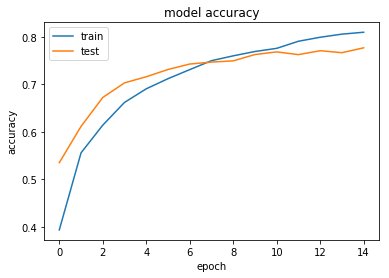

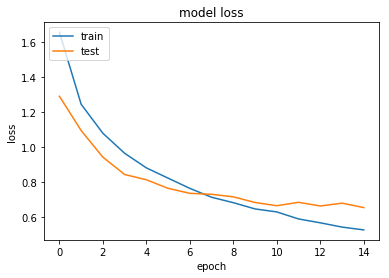

In [46]:
# summarize history for accuracy
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
# evaluate the network
loss, accuracy = model3.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

 9984/10000 [============================>.] - ETA: 0s
Loss: 0.69, Accuracy: 76.84%


-------------------

In [52]:
model4 = Sequential()
model4.add(Conv2D(32, (3,3), strides=(1,1), padding='same', input_shape=(32,32,3)))
model4.add(Activation('relu'))
model4.add(Conv2D(32, (3,3),  padding='same' ,strides=(1,1)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model4.add(Dropout(0.25))
model4.add(Conv2D(64, (3,3),  padding='same' ,strides=(1,1)))
model4.add(Activation('relu'))
model4.add(Conv2D(64, (3,3), padding='same', strides=(1,1)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=(2,2)))
model4.add(Dropout(0.25))
model4.add(Conv2D(64, (3,3),  padding='same' ,strides=(1,1)))
model4.add(Activation('relu'))
model4.add(Conv2D(64, (3,3), strides=(1,1)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=(2,2)))
model4.add(Flatten())
model4.add(Dense(256))
model4.add(Activation('relu'))
model4.add(Dropout(0.25))
model4.add(Dense(10))
model4.add(Activation('softmax'))
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_98 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_99 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 16, 16, 64)        18496     
__________

In [53]:
model4.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])
history4 = model4.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 445s - loss: 1.7959 - acc: 0.3286 - val_loss: 1.4560 - val_acc: 0.4697
Epoch 2/20
40000/40000 [==============================] - 431s - loss: 1.3448 - acc: 0.5096 - val_loss: 1.1756 - val_acc: 0.5771
Epoch 3/20
40000/40000 [==============================] - 422s - loss: 1.1396 - acc: 0.5889 - val_loss: 1.0026 - val_acc: 0.6420
Epoch 4/20
40000/40000 [==============================] - 419s - loss: 1.0118 - acc: 0.6374 - val_loss: 0.9129 - val_acc: 0.6776
Epoch 5/20
40000/40000 [==============================] - 419s - loss: 0.9155 - acc: 0.6747 - val_loss: 0.8639 - val_acc: 0.6978
Epoch 6/20
40000/40000 [==============================] - 421s - loss: 0.8446 - acc: 0.7014 - val_loss: 0.8198 - val_acc: 0.7129
Epoch 7/20
40000/40000 [==============================] - 423s - loss: 0.7865 - acc: 0.7226 - val_loss: 0.7844 - val_acc: 0.7252
Epoch 8/20
40000/40000 [=======================

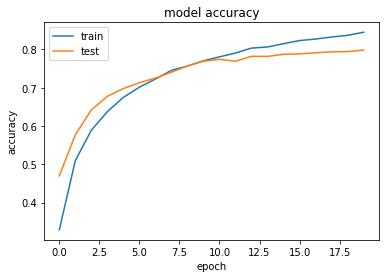

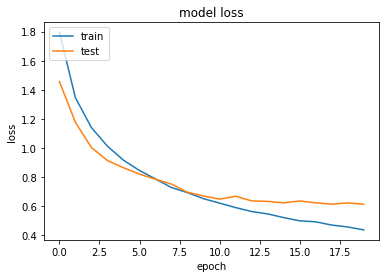

In [54]:
# summarize history for accuracy
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
# evaluate the network
loss, accuracy = model4.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

10000/10000 [==============================] - 35s    

Loss: 0.62, Accuracy: 79.55%


--------------------